# Project Statement

The objective is to predict whether a passenger survived the incident
using the provided passenger-level features.

This is a binary classification problem where the target variable
`Outcome` indicates survival (1) or non-survival (0).


# Initial Data Exploration

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/survival-detection/maritime_train.csv
/kaggle/input/survival-detection/maritime_sample_submission.csv
/kaggle/input/survival-detection/maritime_test.csv


In [2]:
train = pd.read_csv('/kaggle/input/survival-detection/maritime_train.csv')
submission = pd.read_csv('/kaggle/input/survival-detection/maritime_sample_submission.csv')
test = pd.read_csv('/kaggle/input/survival-detection/maritime_test.csv')

Before doing any cleaning, I will check column names, types, missing values and other important things

In [3]:
train.head()

,PassengerId,TicketTier,PassengerName,Gender,Age,RelativesAboard,ParentsChildren,CLass,TicketCost,Berth,BoardingPort,FamilySize,Singleton,FarePerPerson,Title,Outcome
0,338.376107,0.977533,"Partner, Mr. Austen",male,NaN,0.005991,-0.024062,113043,29.104891,C124,S,1,1,25.906873,Mr,0
1,732.225160,2.016456,"Berriman, Mr. William John",male,21.574386,0.091114,-0.021340,28425,11.033567,NaN,S,1,1,10.939094,Mr,0
2,391.314100,2.998448,"Tikkanen, Mr. Juho",male,33.490756,-0.072885,-0.021702,STON/O 2. 3101293,2.234540,NaN,S,1,1,4.065968,Mr,0
3,724.550481,3.045488,"Hansen, Mr. Henrik Juul",male,25.200171,0.913680,0.032986,350025,10.958320,NaN,S,2,0,3.733784,Mr,0
4,810.994274,3.004710,"Andersson, Miss. Ebba Iris Alfrida",female,5.839590,4.009691,1.956266,347082,33.765343,NaN,S,7,0,3.325612,Miss,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      712 non-null    float64
 1   TicketTier       712 non-null    float64
 2   PassengerName    712 non-null    object 
 3   Gender           712 non-null    object 
 4   Age              515 non-null    float64
 5   RelativesAboard  712 non-null    float64
 6   ParentsChildren  712 non-null    float64
 7   CLass            712 non-null    object 
 8   TicketCost       712 non-null    float64
 9   Berth            159 non-null    object 
 10  BoardingPort     710 non-null    object 
 11  FamilySize       712 non-null    int64  
 12  Singleton        712 non-null    int64  
 13  FarePerPerson    712 non-null    float64
 14  Title            712 non-null    object 
 15  Outcome          712 non-null    int64  
dtypes: float64(7), int64(3), object(6)
memory usage: 89.1+ KB


* Null values can be found in `Age`, `Berth`, and `BoardingPort
* There are categorical as well as numerical columns.
* `Outcome` is our target which is binary.
* There are more missing values than I expected.
* At this point I wasn’t sure whether I would even use all columns.

In [5]:
train.isnull().sum()

PassengerId          0
TicketTier           0
PassengerName        0
Gender               0
Age                197
RelativesAboard      0
ParentsChildren      0
CLass                0
TicketCost           0
Berth              553
BoardingPort         2
FamilySize           0
Singleton            0
FarePerPerson        0
Title                0
Outcome              0
dtype: int64

`Age` is numerical and contains a lot of noise, so I decided to impute it with median.
Categorical columns such as `BoardingPort` and `Berth` are also containing missing values. Most categorical columnc are imputed with mode generally.

In [6]:
train.describe()

,PassengerId,TicketTier,Age,RelativesAboard,ParentsChildren,TicketCost,FamilySize,Singleton,FarePerPerson,Outcome
count,712.000000,712.000000,515.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.089668,2.333755,29.783025,0.555223,0.378523,32.456248,1.932584,0.602528,20.043894,0.376404
std,256.347351,0.826466,14.605177,1.174990,0.791899,52.079443,1.682525,0.489719,38.109959,0.484824
min,-19.969283,0.893173,-1.128370,-0.148789,-0.115958,-3.982686,1.000000,0.000000,-4.526815,0.000000
25%,222.160559,1.954529,20.666161,-0.016907,-0.020213,8.380745,1.000000,0.000000,6.596378,0.000000
50%,455.043258,2.954504,28.374231,0.040156,0.017184,14.833240,1.000000,1.000000,9.272521,0.000000
75%,671.639433,3.006993,38.707210,0.967004,0.082670,30.775352,2.000000,1.000000,18.980591,1.000000
max,905.400989,3.108531,79.849115,8.027245,6.045675,514.074158,11.000000,1.000000,512.004226,1.000000


- Many columns like Age, PassengerId, TicketCost, etc have many negative values
- Some features showed skewness, so tree-based models seemed appropriate.

## Data Cleaning
I will separate categorical and numerical columns to build graphs and it will help us in feature engineering

In [7]:
features = ['TicketTier', 'Age', 'TicketCost', 'Gender', 'RelativesAboard', 'ParentsChildren', 'FamilySize', 'CLass', 'Berth', 'BoardingPort', 'Title', 'Singleton', 'FarePerPerson']

In [8]:
name = ['PassengerName']
x = train[features].copy()
y = train['Outcome']
x_test = test[features].copy()

In [9]:
categorical_features = [
    'Gender',
    'CLass',
    'BoardingPort',
    'Title',
    'Singleton',
]

In [10]:
numeric_features = [
    'TicketTier',
    'Age',
    'TicketCost',
    'RelativesAboard',
    'ParentsChildren',
    'FamilySize',
    'FarePerPerson'
]

## Visualisations
I will visualize some graphs to identify relationship between features and our target outcome.

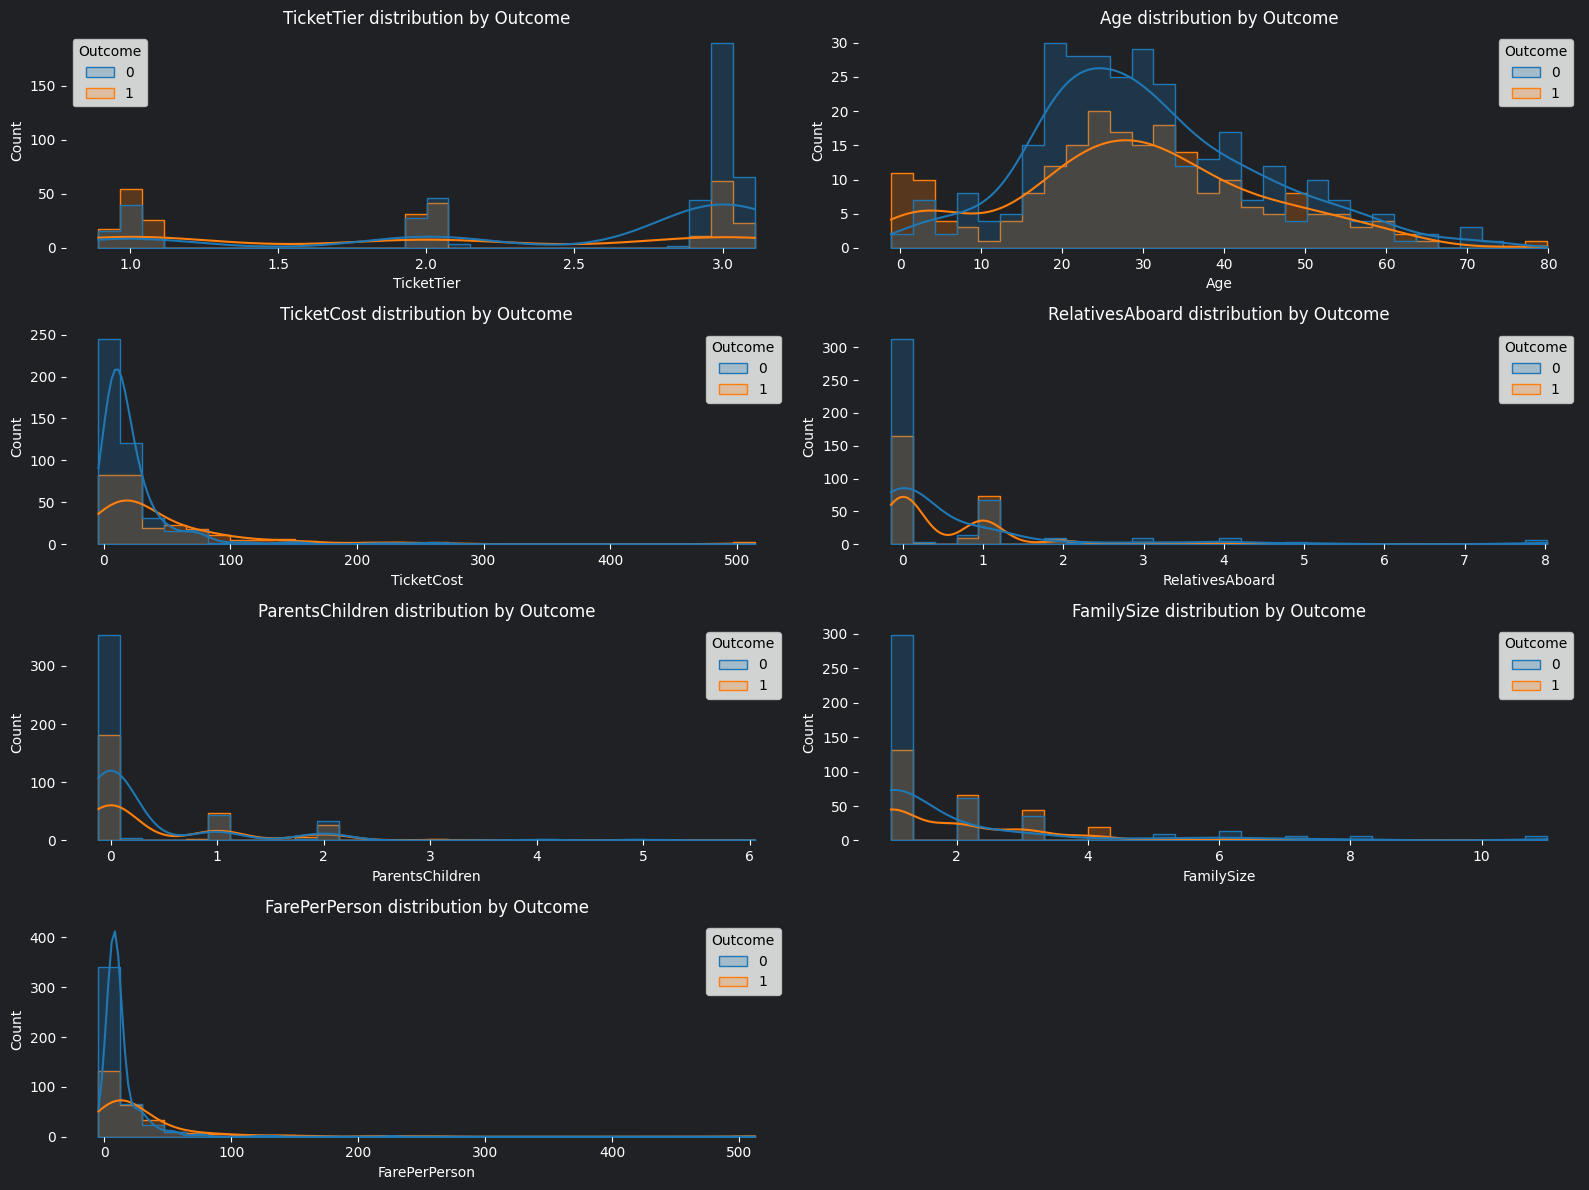

In [11]:
plt.figure(figsize=(16, 12))
plt.gcf().patch.set_facecolor('#202124')

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(4, 2, i)
    ax = sns.histplot(
        data=train,
        x=feature,
        hue='Outcome',
        bins=30,
        kde=True,
        element='step'
    )
    ax.set_facecolor('#202124')
    ax.set_title(f'{feature} distribution by Outcome', color='white')
    ax.set_xlabel(feature, color='white')
    ax.set_ylabel('Count', color='white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    for spine in ax.spines.values():
        spine.set_visible(False)

plt.tight_layout()
plt.show()


* `TicketTier`, `TicketCost`, and `FarePerPerson` are strong predictors.

* The plots didn’t give very clean separation, but some patterns were visible.

* Most of the features are right-tailed.

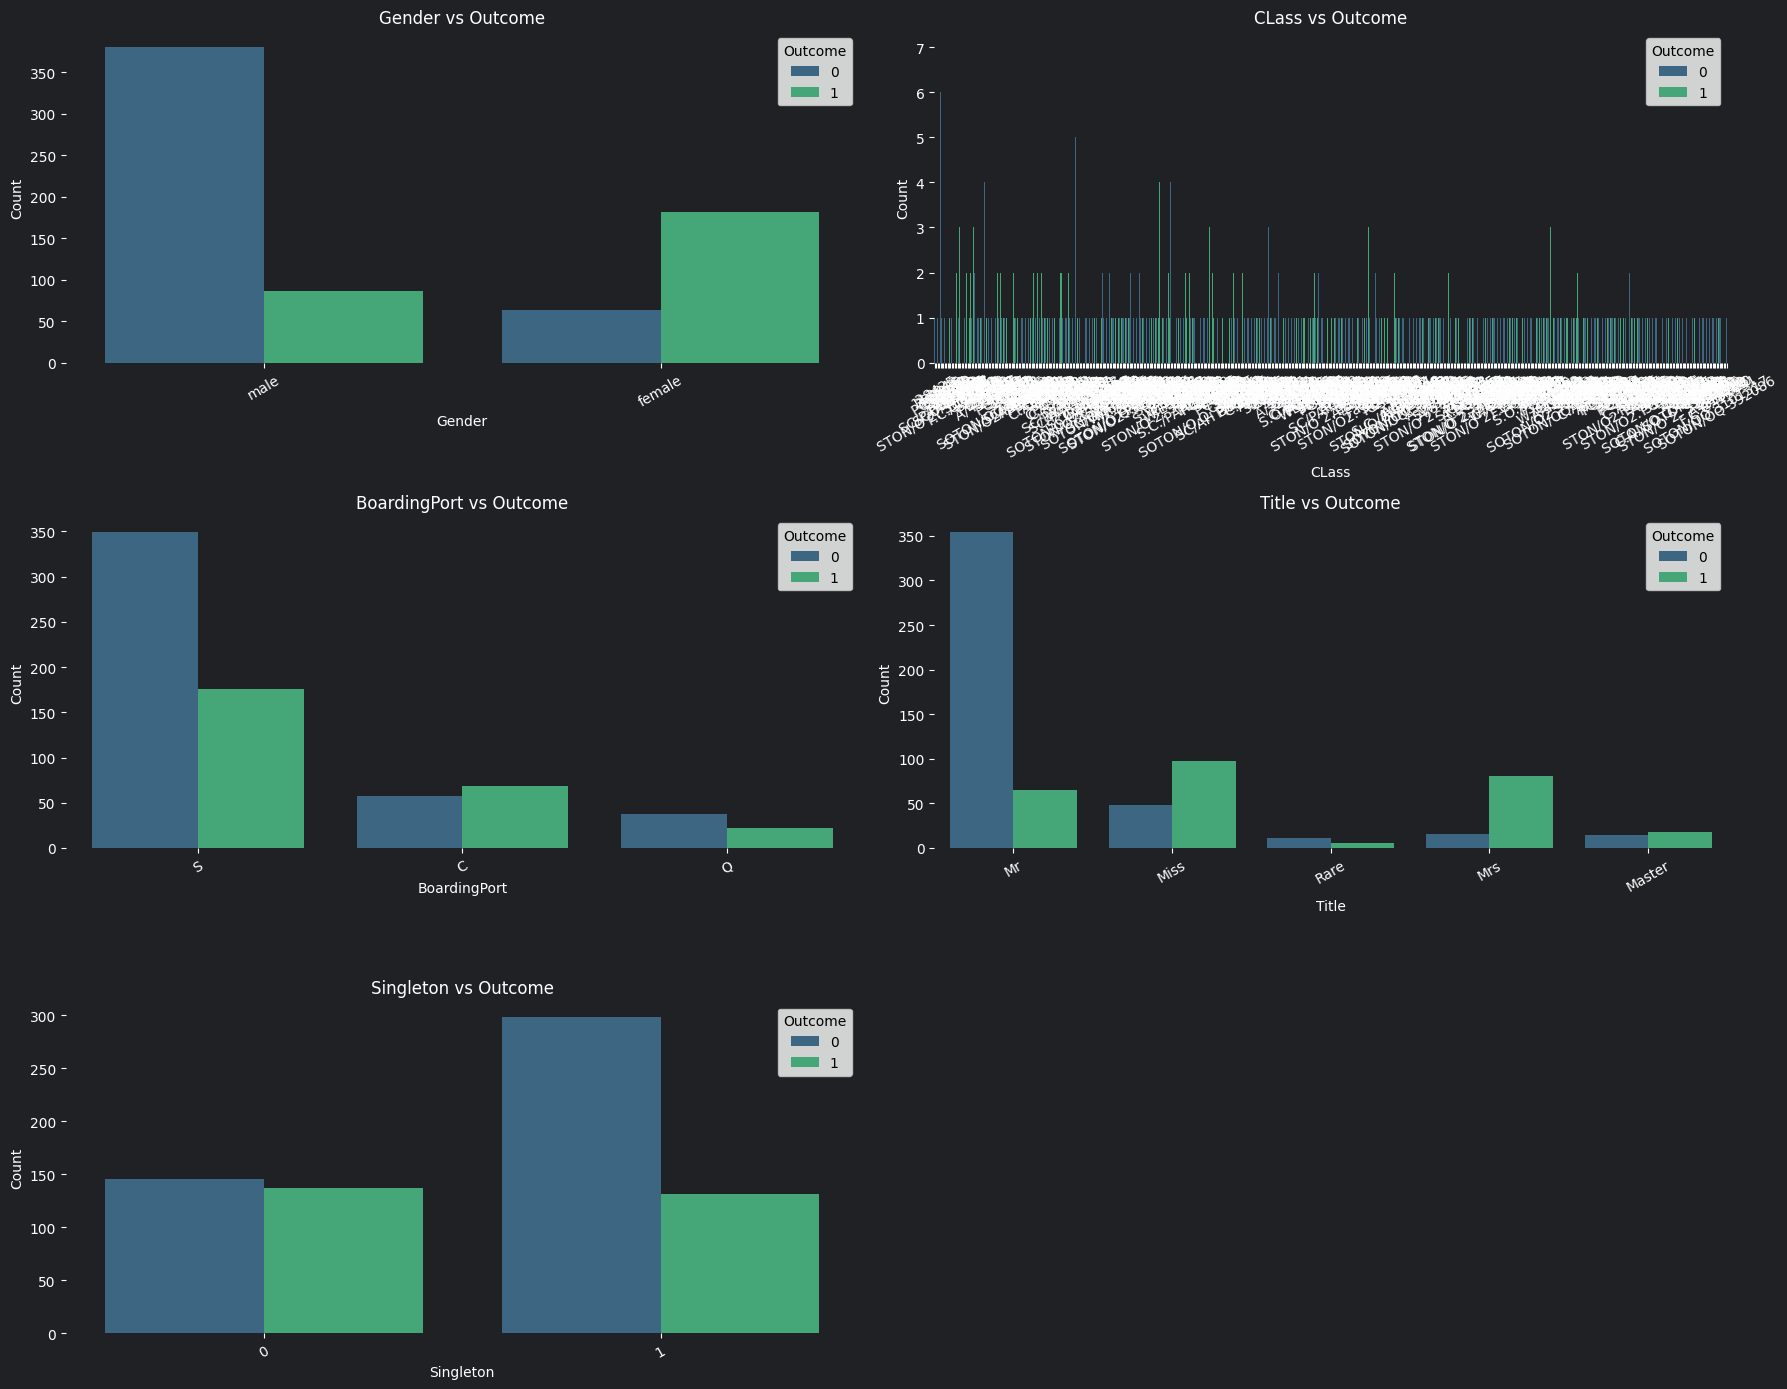

In [12]:
plt.figure(figsize=(18, 14))
plt.gcf().patch.set_facecolor('#202124')

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 2, i)
    ax = sns.countplot(
        data=train,
        x=feature,
        hue='Outcome',
        palette='viridis'
    )
    ax.set_facecolor('#202124')
    ax.set_title(f'{feature} vs Outcome', color='white')
    ax.set_xlabel(feature, color='white')
    ax.set_ylabel('Count', color='white')
    ax.tick_params(axis='x', rotation=30, colors='white')
    ax.tick_params(axis='y', colors='white')
    for spine in ax.spines.values():
        spine.set_visible(False)

plt.tight_layout()
plt.show()


* From the plots, `Gender` and `Title` aare strong predictors.

* `CLass` is noisy and will require transformation or simplification before modeling. Same with `Berth` which I avoided because I was not sure whether to include it r not because of high noise.

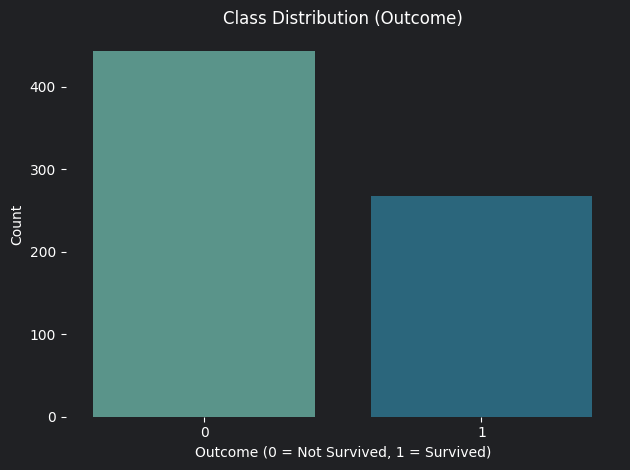

In [13]:
plt.gcf().patch.set_facecolor('#202124')

ax = sns.countplot(
    x=y,
    palette="crest"
)

ax.set_facecolor('#202124')
ax.set_title("Class Distribution (Outcome)", color="white")
ax.set_xlabel("Outcome (0 = Not Survived, 1 = Survived)", color="white")
ax.set_ylabel("Count", color="white")

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

* Class-imbalance: From the graph, we can conclude that there is a slight class imbalance.
* Majority-class: The outcome 0 or those not survived is in majority.
* Minority-class: the outcome 1 or those who survived is in minority.

It is not extreme, but it is enough to justify class weighting later.

# Feature Engineering

In [14]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [15]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

I chose One Hot Encoding and StandardScaler that will tranform our data in such a way that its distribution will be having mean 0 and variance unity and we will have equal importance to all the features. 

In [16]:
numerical = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical = Pipeline(steps=[
    ("mode", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

For categorical columns, I used the most frequent value
since there is not a natural numerical replacement.

In [17]:
transformer = ColumnTransformer(transformers=[
    ("numerical", numerical, numeric_features),
    ("categorical", categorical, categorical_features)
], remainder="passthrough").set_output(transform="pandas")

In [18]:
x = x.drop(columns=['Berth'])
x_test = x_test.drop(columns=['Berth'])

I went back and forth on Berth. I tried keeping it, but after encoding it blew up into too many columns
and didn’t help much in validation. At that point it felt like more trouble than it was worth,
so I dropped it.


# Model Building
I started with Logistic Regression mostly as a baseline.
I wanted something simple to see if the data even makes sense.

If this failed badly, I planned to revisit preprocessing first.


## Logistic Regression

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [20]:
model = Pipeline(steps=[
    ("preprocessor", transformer),
    ("classifier", LogisticRegression(max_iter=1000))
])

In [21]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(model, x, y,cv=cv,scoring="accuracy")

cv_scores, cv_scores.mean()

(array([0.82517483, 0.87412587, 0.86619718, 0.78873239, 0.83098592]),
 np.float64(0.8370432384516893))

Scores varied more than I expected. It provided a good one but:
* Validation performance was unstable

* It struggled with non-linear interactions

* Still useful as a benchmark.

## Random Forest
I then moved to Random Forest mainly to handle non-linearity.

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
# max_depth n_estimators etc are chosen to avoid overfitting after initial experiments
rf = Pipeline(steps=[
    ('preprocessor', transformer),
    ('classifier', RandomForestClassifier(
        n_estimators = 900,
        max_depth = 8,
        min_samples_split = 5,
        min_samples_leaf = 2,
        random_state = 40,
        n_jobs = -1
    ))
])

I tried using diferent parameters, like adjusting n_estimators starting from 300 to 1000, max_depth from 7 to 8, etc to get my desired score

In [24]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(rf,x,y,cv=cv,scoring="accuracy")

cv_scores, cv_scores.mean()

(array([0.7972028 , 0.86013986, 0.83098592, 0.77464789, 0.8028169 ]),
 np.float64(0.813158672313602))

Random Forest RMSE is worse than Logistic Regression, so I need to try with other models

## Logistic Regression
with some parameters and class-weighting

In [25]:
reg = Pipeline(steps=[
    ("preprocessor", transformer),
    ("classifier", LogisticRegression(
        max_iter=1000,
        solver='liblinear'
    ))
])

In [26]:
balanced_reg = Pipeline(steps=[
    ("preprocessor", transformer),
    ("classifier", LogisticRegression(
        C=10,
        class_weight="balanced",
        max_iter=1000,
        solver="liblinear"
    ))
])

I experimented with parameters by changing again and again to get best ones.
And I used balanced class weights on regression because from the graph, we can see that there is a class imbalance in our target or outcome column.

Since survival is the minority class, I retried Logistic Regression with class_weight="balanced"

This improved performance.

In [27]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

balanced_scores = cross_val_score(balanced_reg,x,y,cv=cv,scoring="accuracy"
)

balanced_scores, balanced_scores.mean()

(array([0.81118881, 0.87412587, 0.85915493, 0.78873239, 0.84507042]),
 np.float64(0.8356544863587116))

In [28]:
# test_pred = final.predict(x_test)

In [29]:
# submission_df = pd.DataFrame({
#     'PassengerName': test["PassengerName"],
#     'Outcome': test_pred
# })
# submission_df.to_csv('submission.csv', index=False)

In [30]:
# submission.head()

In [31]:
balanced_reg.fit(x,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['TicketTier', 'Age',
                                                   'TicketCost',
                                                   'RelativesAboard',
                                                   'ParentsChildren',
                                                   'FamilySize',
                                                   'FarePerPerson']),
                                                 ('categorical',
                                                  Pipeline(steps=[('mode',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender', 'CLass',
                                                   'BoardingPort', 'Title',
                                                   'Singleton'])])),
                ('classifier',
                 LogisticRegression(C=10, class_weight='balanced',
                                    max_iter=1000, solver='liblinear'))])

In [32]:
balanced_reg_pred = balanced_reg.predict(x_test)
submission_reg = pd.DataFrame({
    "PassengerName": test["PassengerName"],
    "Outcome": balanced_reg_pred
})

In [33]:
submission_reg.to_csv("submission.csv", index=False)

## XGBoost
To further improve my score I want to try boosting using xgboost and xgb classifier byt trying out different parameters.


In [34]:
from xgboost import XGBClassifier
import xgboost as xgb

In [35]:
xgb_model = Pipeline(steps=[
    ("preprocessor", transformer),
    ("classifier", XGBClassifier(
        n_estimators=300,
        max_depth=4,
        learning_rate=1,
        random_state=42,
    ))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

xgb_scores = cross_val_score(
    xgb_model,
    x,
    y,
    cv=cv,
    scoring="accuracy"
)

xgb_scores, xgb_scores.mean()

(array([0.7972028 , 0.83916084, 0.76056338, 0.75352113, 0.76760563]),
 np.float64(0.7836107554417413))

XGBoost reduced my RMSE score, so boosting failed and logistics regression wins.
